In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import accuracy

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [4]:
model.compile(optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
                loss=nn.CrossEntropyLoss(),
                metrics={'acc': accuracy},
                )

In [5]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [6]:
def f(trainer):
    print(trainer.epoch)

history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            shuffle_val_split=True,
            callbacks=k4t.callbacks.LambdaCallback(on_epoch_begin=f)
            )

Train on 120 samples, validate on 30 samples:
1
Epoch 1/15 - 0.0s - loss: 1.0646 - acc: 0.3568 - val_loss: 1.1786 - val_acc: 0.2333 - lr: 3e-04
2
Epoch 2/15 - 0.0s - loss: 1.0033 - acc: 0.3672 - val_loss: 1.0997 - val_acc: 0.2667 - lr: 3e-04
3
Epoch 3/15 - 0.0s - loss: 0.9711 - acc: 0.4609 - val_loss: 1.0418 - val_acc: 0.4333 - lr: 3e-04
4
Epoch 4/15 - 0.0s - loss: 0.9429 - acc: 0.6927 - val_loss: 1.0023 - val_acc: 0.5000 - lr: 3e-04
5
Epoch 5/15 - 0.0s - loss: 0.9199 - acc: 0.6953 - val_loss: 0.9797 - val_acc: 0.5000 - lr: 3e-04
6
Epoch 6/15 - 0.0s - loss: 0.8922 - acc: 0.7109 - val_loss: 0.9575 - val_acc: 0.5000 - lr: 3e-04
7
Epoch 7/15 - 0.0s - loss: 0.8726 - acc: 0.7057 - val_loss: 0.9414 - val_acc: 0.5000 - lr: 3e-04
8
Epoch 8/15 - 0.0s - loss: 0.8479 - acc: 0.7057 - val_loss: 0.9263 - val_acc: 0.5000 - lr: 3e-04
9
Epoch 9/15 - 0.0s - loss: 0.8283 - acc: 0.7057 - val_loss: 0.9086 - val_acc: 0.5000 - lr: 3e-04
10
Epoch 10/15 - 0.0s - loss: 0.8031 - acc: 0.7135 - val_loss: 0.8961 - 

<AxesSubplot:>

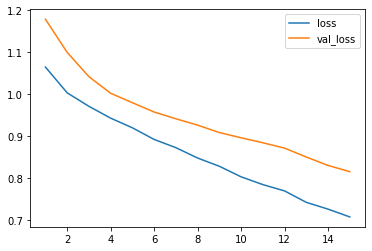

In [7]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [8]:
model.evaluate(X, y)

OrderedDict([('loss', 0.7042058), ('acc', 0.6875)])

In [9]:
model.predict(X)

array([[ 0.7317953 , -0.29354423, -0.39391077],
       [ 0.66087866, -0.24004681, -0.3411274 ],
       [ 0.67640734, -0.2627573 , -0.36129498],
       [ 0.5760663 , -0.21860515, -0.31441548],
       [ 0.72186077, -0.2953551 , -0.39611104],
       [ 0.6648742 , -0.29263955, -0.3672573 ],
       [ 0.61685807, -0.25649998, -0.3405915 ],
       [ 0.6775371 , -0.2612106 , -0.37153962],
       [ 0.5653806 , -0.20658223, -0.30411866],
       [ 0.6488799 , -0.23356907, -0.34592897],
       [ 0.76356125, -0.30960017, -0.41275647],
       [ 0.5919418 , -0.23894991, -0.3305472 ],
       [ 0.6554377 , -0.23712115, -0.34138617],
       [ 0.6614815 , -0.2585734 , -0.3424435 ],
       [ 0.90251625, -0.38089398, -0.45350254],
       [ 0.81384075, -0.36479938, -0.4479222 ],
       [ 0.79762614, -0.34019825, -0.42476597],
       [ 0.7200726 , -0.29097033, -0.3898377 ],
       [ 0.74221516, -0.2975365 , -0.40622762],
       [ 0.7023152 , -0.29796112, -0.39256382],
       [ 0.67285216, -0.25129014, -0.363